In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


import os
for dirname in os.listdir('/kaggle/input/cat-and-dog/'):
    print(dirname)


test_set
training_set


In [3]:
training_data = '/kaggle/input/cat-and-dog/training_set/training_set'
test_data= '/kaggle/input/cat-and-dog/test_set/test_set'

In [4]:
from PIL import Image
print(os.listdir(training_data))
img = Image.open(training_data+'/dogs/dog.967.jpg')
resized = img.resize((224,224))
resized.size

['dogs', 'cats']


(224, 224)

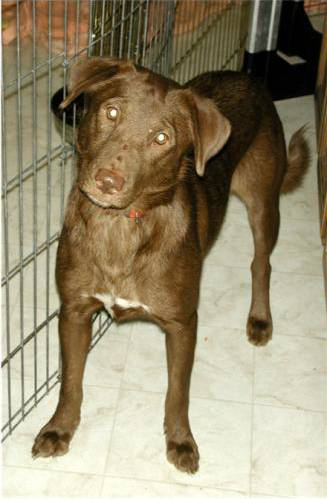

In [5]:
img = Image.open('/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1.jpg')
img

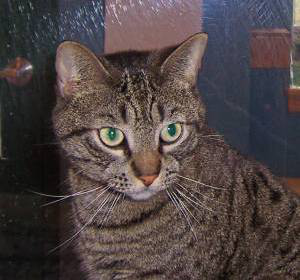

In [6]:
Image.open(training_data+'/cats/cat.1.jpg')

In [8]:
import pathlib
training_data = pathlib.Path(training_data).with_suffix('')
img_count=len(list(training_data.glob('*/*.jpg')))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  training_data,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

type(train_ds)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  training_data,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [26]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2023 files belonging to 2 classes.


In [14]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


2023-02-09 07:42:25.403160: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


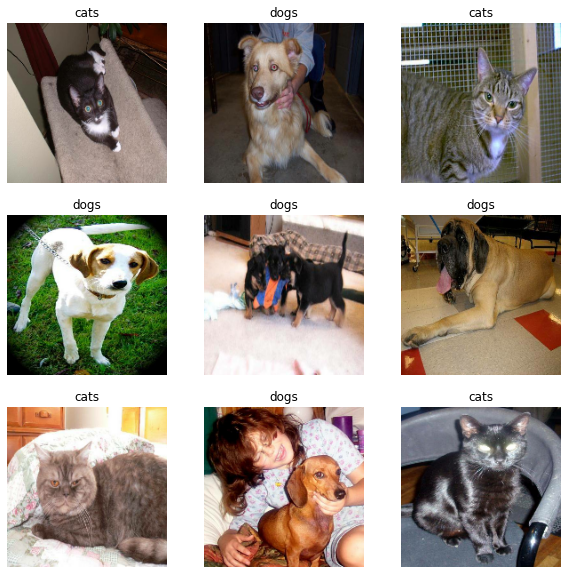

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
data_augmentation = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1)
])

In [33]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,name='outputs')
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 22, 22, 64)       

In [36]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
201/201 [==============================] - 75s 361ms/step - loss: 0.7011 - accuracy: 0.5178 - val_loss: 0.6901 - val_accuracy: 0.5166
Epoch 2/10
201/201 [==============================] - 70s 346ms/step - loss: 0.6772 - accuracy: 0.5807 - val_loss: 0.6696 - val_accuracy: 0.5890
Epoch 3/10
201/201 [==============================] - 70s 346ms/step - loss: 0.6408 - accuracy: 0.6340 - val_loss: 0.6598 - val_accuracy: 0.6259
Epoch 4/10
201/201 [==============================] - 70s 348ms/step - loss: 0.6134 - accuracy: 0.6643 - val_loss: 0.6343 - val_accuracy: 0.6415
Epoch 5/10
201/201 [==============================] - 70s 346ms/step - loss: 0.6034 - accuracy: 0.6705 - val_loss: 0.6374 - val_accuracy: 0.6309
Epoch 6/10
201/201 [==============================] - 69s 342ms/step - loss: 0.5990 - accuracy: 0.6793 - val_loss: 0.5953 - val_accuracy: 0.6814
Epoch 7/10
201/201 [==============================] - 69s 341ms/step - loss: 0.5840 - accuracy: 0.6888 - val_loss: 0.6015 - val_ac

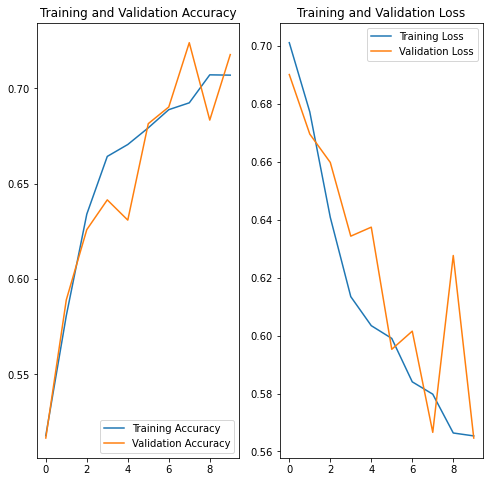

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
test_predictions = model.predict(test_ds)
test_predictions.shape

(2023, 2)

In [57]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

64/64 [==============================] - 5s 76ms/step - loss: 0.5511 - accuracy: 0.7163
Accuracy 0.7162629961967468
